# Problem Statament:
### Churn prediction model

We define churn as a customer not placing any order within the next 60 days. We construct a weekly ‘at-risk’ panel where each row is a customer-week snapshot with 7–60 days since the last purchase, ensuring the customer is neither too recent nor already churned. Labels are assigned using a 60-day look-forward window from the snapshot date, and we exclude snapshots near the dataset end to avoid incomplete labeling. We split train/validation/test chronologically by snapshot date to prevent time leakage. The model is used operationally by ranking at-risk users weekly and targeting the top K% (coupon budget) for retention interventions

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from pathlib import Path # Use pathlib for OS-independent path handling
import matplotlib.pyplot as plt 

# 1. Define the location of your CSV files
# Use a raw string (r'') to handle backslashes in Windows paths, or use forward slashes
file_location = r'/Users/rahulagarwal/Desktop/VS/DS Projects/Ecom Dataset by Olist' # Example path

# 2. Find all CSV files in the specified location
# The pattern "*.csv" will match all files ending with .csv in that directory
search_pattern = os.path.join(file_location, '*.csv')
csv_files = glob.glob(search_pattern)

# 3. Create an empty dictionary to store the DataFrames
dfs = {}

# 4. Loop through the files, read each into a DataFrame, and store it in the dictionary
for file_path in csv_files:
    # Extract the filename without the extension to use as the dictionary key/dataframe name
    # pathlib.Path(file_path).stem provides a clean, OS-independent way to do this
    df_name = Path(file_path).stem
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Store the DataFrame in the dictionary with the file name as the key
    dfs[df_name] = df
    print(f"Read '{df_name}' into the 'dfs' dictionary.")


Read 'olist_sellers_dataset' into the 'dfs' dictionary.
Read 'product_category_name_translation' into the 'dfs' dictionary.
Read 'olist_orders_dataset' into the 'dfs' dictionary.
Read 'olist_order_items_dataset' into the 'dfs' dictionary.
Read 'olist_customers_dataset' into the 'dfs' dictionary.
Read 'olist_geolocation_dataset' into the 'dfs' dictionary.
Read 'olist_order_payments_dataset' into the 'dfs' dictionary.
Read 'olist_order_reviews_dataset' into the 'dfs' dictionary.
Read 'olist_products_dataset' into the 'dfs' dictionary.


In [2]:
dfs['olist_sellers_dataset'].head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [3]:
dfs['product_category_name_translation'].head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [4]:
dfs['olist_orders_dataset'].head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [5]:
dfs['olist_order_items_dataset'].head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [6]:
dfs['olist_customers_dataset'].head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [7]:
dfs['olist_geolocation_dataset'].head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [8]:
dfs['olist_order_payments_dataset'].head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [9]:
dfs['olist_order_reviews_dataset'].head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [10]:
dfs['olist_products_dataset'].head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

<center><img src='image.png' height=400 width=700> </center>

* Demographics
    * olist_customers_dataset - *customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state* - customer demographics
    * olist_sellers_dataset - *seller_id, seller_zip_code_prefix, seller_city, seller_state* - seller demographics
    * olist_geolocation_dataset - *geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state* - geographical details

* Orders
    * olist_orders_dataset - *order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date* - all order details (overall)
    * olist_order_payments_dataset - *order_id, payment_sequential, payment_type, payment_installments, payment_value* - order payment details
    * olist_order_items_dataset - *order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value* - order_id details
    * olist_order_reviews_dataset - *review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp* - order reviews

* Products
    * olist_products_dataset - *product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm* - product details
    * product_category_name_translation - *product_category_name, product_category_name_english* - translation of product

## EDA

In [11]:
dfs['olist_customers_dataset'].isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [12]:
dfs['olist_order_reviews_dataset'].isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [13]:
dfs['olist_order_payments_dataset'].isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [14]:
dfs['olist_order_items_dataset'].isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

There are no null values apart from reviews which is expected, not everyone will review their order.

In [15]:
dfs['olist_order_reviews_dataset'][dfs['olist_order_reviews_dataset']['review_comment_message'].notnull()].head()

review_id                          order_id  \
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

    review_score review_comment_title  \
3              5                  NaN   
4              5                  NaN   
9              4            recomendo   
12             4                  NaN   
15             5      Super recomendo   

                               review_comment_message review_creation_date  \
3               Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4   Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
9   aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   
12    Mas um pouco ,travando...pelo valor ta Boa.\r\n  2018-02-16 00:00:00   
15  Vendedor confiável, produto ok e entrega antes...  2018-05-23 00:00:00   

   review_answer_timestamp  
3      2017-04-21 22:02:06  
4      2018-03-02 10:26:53  
9      2018-05-23 16:45:47  
12     2018-02-20 10:52:22  
15     2018-05-24 03:00:01

In [16]:
def duplicate_grps(df, col):
    cnt_per_grp = df.groupby(col).size().rename('cnt')          # (grp -> cnt)
    result = (
    cnt_per_grp.value_counts()                                # (cnt -> count of groups with that cnt)
    .rename('count')
    .reset_index()
    .rename(columns={'index': 'cnt'})
    .sort_values('count', ascending=False)
    )
    print(result)

In [17]:
def duplicate_grps_unique(df, col, col2):
    cnt_per_grp = df.groupby(col)[col2].nunique().rename('cnt')  # count(distinct col) per grp
    result = (
    cnt_per_grp.value_counts()                                  # count of grps having each cnt
    .rename('count')
    .reset_index()
    .rename(columns={'index': 'cnt'})
    .sort_values('count', ascending=False)
    )
    print(result)

In [18]:
duplicate_grps(dfs['olist_order_reviews_dataset'], 'order_id')

   cnt  count
0    1  98126
1    2    543
2    3      4


Some order ids have duplicates but it can be ignored since it is 0.5% of dataset

In [19]:
duplicate_grps(dfs['olist_order_payments_dataset'], 'order_id')

    cnt  count
0     1  96479
1     2   2382
2     3    301
3     4    108
4     5     52
5     6     36
6     7     28
7     8     11
8     9      9
10   12      8
9    11      8
11   10      5
12   13      3
13   15      2
14   14      2
15   19      2
16   22      1
17   21      1
18   26      1
19   29      1


In [20]:
duplicate_grps(dfs['olist_order_items_dataset'], 'order_id')

    cnt  count
0     1  88863
1     2   7516
2     3   1322
3     4    505
4     5    204
5     6    198
6     7     22
8    10      8
7     8      8
9    12      5
10   11      4
11    9      3
12   15      2
13   14      2
14   20      2
15   13      1
16   21      1


Both payments and items datasets have duplicates that is acceptable and user can pay by multiple mods for one order also and can order multiple items

In [21]:
dfs['olist_order_items_dataset'].groupby('order_id').filter(lambda x: len(x) > 2)

order_id  order_item_id  \
32      00143d0f86d6fbd9f9b38ab440ac16f5              1   
33      00143d0f86d6fbd9f9b38ab440ac16f5              2   
34      00143d0f86d6fbd9f9b38ab440ac16f5              3   
42      001ab0a7578dd66cd4b0a71f5b6e1e41              1   
43      001ab0a7578dd66cd4b0a71f5b6e1e41              2   
...                                  ...            ...   
112617  ffecd5a79a0084f6a592288c67e3c298              3   
112640  fffb9224b6fc7c43ebb0904318b10b5f              1   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
32      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
33      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
34      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0fab3d5d883e1630ec6   
42      0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
43      0b0172eb0fd18479d29c3bc122c058c2  5656537e588803a555b8eb41f07a944b   
...                                  ...                               ...   
112617  50fd2b788dc166edd20512370dac54df  8b321bb669392f5163d04c59e235e066   
112640  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112641  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112642  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
112643  43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   

        shipping_limit_date  price  freight_value  
32      2017-10-20 16:07:52  21.33          15.10  
33      2017-10-20 16:07:52  21.33          15.10  
34      2017-10-20 16:07:52  21.33          15.10  
42      2018-01-04 02:33:42  24.89          17.63  
43      2018-01-04 02:33:42  24.89          17.63  
...                     ...    ...            ...  
112617  2018-03-05 20:15:27  21.90          15.79  
112640  2017-11-03 02:55:58  55.00          34.19  
112641  2017-11-03 02:55:58  55.00          34.19  
112642  2017-11-03 02:55:58  55.00          34.19  
112643  2017-11-03 02:55:58  55.00          34.19  

[8755 rows x 7 columns]

In [22]:
## Comparing value between orders table and payments table are they matching or there is a difference
dfs['olist_order_items_dataset']['total']=dfs['olist_order_items_dataset']['price'] + dfs['olist_order_items_dataset']['freight_value']
a=dfs['olist_order_items_dataset'].groupby('order_id')['total'].sum().reset_index()
b=dfs['olist_order_payments_dataset'].groupby('order_id')['payment_value'].sum().reset_index()
final_df=pd.merge(a,b, how='inner', on='order_id')
final_df

order_id   total  payment_value
0      00010242fe8c5a6d1ba2dd792cb16214   72.19          72.19
1      00018f77f2f0320c557190d7a144bdd3  259.83         259.83
2      000229ec398224ef6ca0657da4fc703e  216.87         216.87
3      00024acbcdf0a6daa1e931b038114c75   25.78          25.78
4      00042b26cf59d7ce69dfabb4e55b4fd9  218.04         218.04
...                                 ...     ...            ...
98660  fffc94f6ce00a00581880bf54a75a037  343.40         343.40
98661  fffcd46ef2263f404302a634eb57f7eb  386.53         386.53
98662  fffce4705a9662cd70adb13d4a31832d  116.85         116.85
98663  fffe18544ffabc95dfada21779c9644f   64.71          64.71
98664  fffe41c64501cc87c801fd61db3f6244   55.79          55.79

[98665 rows x 3 columns]

In [23]:
print("Number of mismatches (using value_counts): ", (final_df['total'].round(2) != final_df['payment_value'].round(2)).value_counts())

Number of mismatches (using value_counts):  False    98089
True       576
Name: count, dtype: int64


In [24]:
# Checking if data is not matching due to rounding off
final_df[final_df['total'].round(2)!=final_df['payment_value'].round(2)]

order_id   total  payment_value
134    005d9a5423d47281ac463a968b3936fb  145.25         145.26
165    00789ce015e7e5791c7914f32bb4fad4  168.83         190.81
525    016726239765c18f66826453f39c64e3  235.13         265.77
724    01e51b7c3025655646143d09b911e1d7   33.10          35.02
965    028aa7c930356788f861ed1b7f984819   57.53          62.94
...                                 ...     ...            ...
97656  fd571ab12e8d263eaf309774eedfcfeb  948.70         948.69
97808  fdb034f444a32838124d8907e443d249   31.38          33.56
97992  fe35e99a6a5d4d036bf8167d364e0792  262.60         262.59
98219  fecb65750b4fe05b8257f650b2e114a2  216.76         216.75
98554  ffb18bf111fa70edf316eb0390427986  617.25         617.24

[576 rows x 3 columns]

In [25]:
duplicate_grps(dfs['olist_customers_dataset'], 'customer_unique_id')

   cnt  count
0    1  93099
1    2   2745
2    3    203
3    4     30
4    5      8
5    6      6
6    7      3
7    9      1
8   17      1


In [26]:
dfs['olist_customers_dataset'].groupby('customer_unique_id').filter(lambda x: len(x) > 3)

customer_id                customer_unique_id  \
134    acca74d2a60c03b46a5256c02cef9244  f34cd7fd85a1f8baff886edf09567be3   
617    a666bb7a77916be2716fa1420c73c56f  4e65032f1f574189fb793bac5a867bbc   
747    fae1bc18fc44fd9a65149ceefe83811f  a7657330b1c135f3acd420326e335b2c   
1092   87863ad6c20c831af722c2401a1daf59  b896655e2083a1d76b7b85df8fc86e40   
1302   9551c9f70be99f31e88354c565e543f0  795c1622cf7a53d63d324e862349d01c   
...                                 ...                               ...   
97191  90e96fc65e2b0b97264512ed783f86e4  dc813062e0fc23409cd255f7f53c7074   
97247  eb6c2016db590aefde406e79651a4e8d  d3359a56d96666ac0c21bb01e7a61c95   
97358  ab9fe017b1de9118ef7b8273ddbce479  a0abd26659c9914690cbd3320d39fd96   
98493  a969b9f8d923bc7fd97b578f7c499194  12f5d6e1cbf93dafd9dcc19095df0b3d   
98986  dbe9495069f4ddb6875dfc83462d616f  c8460e4251689ba205045f3ea17884a1   

       customer_zip_code_prefix       customer_city customer_state  
134                       89120               timbo             SC  
617                        9531  sao caetano do sul             SP  
747                       38550          coromandel             MG  
1092                       7998    francisco morato             SP  
1302                      82315            curitiba             PR  
...                         ...                 ...            ...  
97191                     55293           garanhuns             PE  
97247                      3162           sao paulo             SP  
97358                     92412              canoas             RS  
98493                     82200            curitiba             PR  
98986                     91170        porto alegre             RS  

[243 rows x 5 columns]

In [27]:
dfs['olist_customers_dataset'][dfs['olist_customers_dataset']['customer_unique_id']=='f34cd7fd85a1f8baff886edf09567be3']

customer_id                customer_unique_id  \
134    acca74d2a60c03b46a5256c02cef9244  f34cd7fd85a1f8baff886edf09567be3   
63532  eccf5f0bc39613de60c5ca015a5541c6  f34cd7fd85a1f8baff886edf09567be3   
69188  05ce0877a2e5b2962c27bb5ebe62caad  f34cd7fd85a1f8baff886edf09567be3   
94889  ebd63abbdb05e1f65308cf14a44a488a  f34cd7fd85a1f8baff886edf09567be3   

       customer_zip_code_prefix customer_city customer_state  
134                       89120         timbo             SC  
63532                     89120         timbo             SC  
69188                     89120         timbo             SC  
94889                     89107      pomerode             SC

In [28]:
dfs['olist_orders_dataset'][dfs['olist_orders_dataset']['customer_id']=='eccf5f0bc39613de60c5ca015a5541c6']

order_id                       customer_id  \
45895  175e7244409a1c34674cdd3407e25808  eccf5f0bc39613de60c5ca015a5541c6   

      order_status order_purchase_timestamp    order_approved_at  \
45895    delivered      2017-08-22 12:49:29  2017-08-22 13:07:30   

      order_delivered_carrier_date order_delivered_customer_date  \
45895          2017-08-31 13:18:31           2017-09-05 18:57:36   

      order_estimated_delivery_date  
45895           2017-09-18 00:00:00

Hence, each unique_customer_id has multiple customer_ids

In [29]:
# Checking all payment options available
dfs['olist_order_payments_dataset']['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [30]:
# converting to timestamp datatype
dfs['olist_orders_dataset']['order_purchase_timestamp']=pd.to_datetime(dfs['olist_orders_dataset']['order_purchase_timestamp'])

In [31]:
# getting order ids at unique_customer_id level
dfs['olist_orders_dataset']['order_date']=pd.to_datetime(dfs['olist_orders_dataset']['order_purchase_timestamp'].dt.date)
df1=dfs['olist_orders_dataset'][['order_id','customer_id','order_date']].drop_duplicates()
customer_order_date = pd.merge(df1, dfs['olist_customers_dataset'], on='customer_id', how='inner')
customer_order_date=customer_order_date[['order_id','customer_unique_id','order_date']].drop_duplicates()
customer_order_date

order_id                customer_unique_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  7c396fd4830fd04220f754e42b4e5bff   
1      53cdb2fc8bc7dce0b6741e2150273451  af07308b275d755c9edb36a90c618231   
2      47770eb9100c2d0c44946d9cf07ec65d  3a653a41f6f9fc3d2a113cf8398680e8   
3      949d5b44dbf5de918fe9c16f97b45f8a  7c142cf63193a1473d2e66489a9ae977   
4      ad21c59c0840e6cb83a9ceb5573f8159  72632f0f9dd73dfee390c9b22eb56dd6   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  6359f309b166b0196dbf7ad2ac62bb5a   
99437  63943bddc261676b46f01ca7ac2f7bd8  da62f9e57a76d978d02ab5362c509660   
99438  83c1379a015df1e13d02aae0204711ab  737520a9aad80b3fbbdad19b66b37b30   
99439  11c177c8e97725db2631073c19f07b62  5097a5312c8b157bb7be58ae360ef43c   
99440  66dea50a8b16d9b4dee7af250b4be1a5  60350aa974b26ff12caad89e55993bd6   

      order_date  
0     2017-10-02  
1     2018-07-24  
2     2018-08-08  
3     2017-11-18  
4     2018-02-13  
...          ...  
99436 2017-03-09  
99437 2018-02-06  
99438 2017-08-27  
99439 2018-01-08  
99440 2018-03-08  

[99441 rows x 3 columns]

In [32]:
dfs['olist_orders_dataset'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
 8   order_date                     99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(7)
memory usage: 6.8+ MB


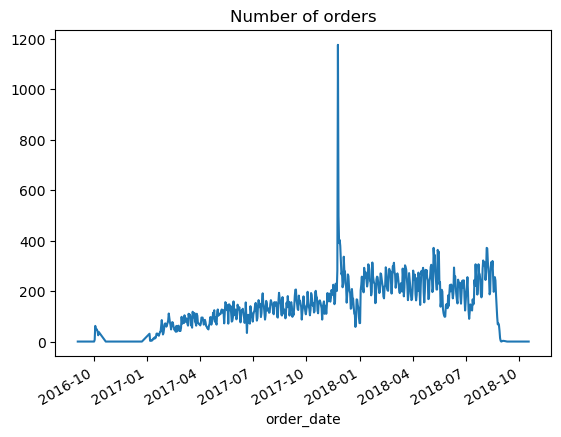

In [33]:
orders_trend=customer_order_date.groupby("order_date")["order_id"].count()
orders_trend.plot(title='Number of orders')
plt.show()

In [34]:
repeat_buyers=customer_order_date.groupby("customer_unique_id")["order_id"].count().rename('total_orders').reset_index()
repeat_buyers.groupby('total_orders')['customer_unique_id'].count()

total_orders
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: customer_unique_id, dtype: int64

## Defining Churn

Since we don't have app open data, we'll have to define churn of a user basis their order activity only

In [35]:
gaps = (
    customer_order_date.sort_values(['customer_unique_id','order_date'])
      .groupby('customer_unique_id')['order_date']
      .diff()
      .dt.days
      .dropna()
)

X = int(gaps.quantile(0.95))   # churn window in days
X

312

Since we have to define churn probability, we'll have to take those users only who have atleast two orders placed (~3000users)

In [36]:
customer_order_datef= customer_order_date.sort_values(['customer_unique_id','order_date']).copy()
customer_order_date['order_date'] = pd.to_datetime(customer_order_date['order_date'])

orders_per_user = customer_order_date.groupby('customer_unique_id').size()
repeat_users = orders_per_user[orders_per_user >= 2].index

gaps = (
    customer_order_date[customer_order_date['customer_unique_id'].isin(repeat_users)]
      .groupby('customer_unique_id')['order_date']
      .diff()
      .dt.days
      .dropna()
)

gaps.quantile([0.5, 0.75, 0.9, 0.95, 0.99])


0.50      0.0
0.75     34.0
0.90    161.0
0.95    248.8
0.99    383.0
Name: order_date, dtype: float64

In [37]:
customer_order_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            99441 non-null  object        
 1   customer_unique_id  99441 non-null  object        
 2   order_date          99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


In [38]:
T = customer_order_date['order_date'].max()  # snapshot at end of data
last_order = customer_order_date.groupby('customer_unique_id')['order_date'].max()

churned = last_order <= (T - pd.Timedelta(days=365))
churn_rate = churned.mean()

churn_rate


0.29790001665001664

In [39]:
# Checking churn rate basis next order date of the usern to define efficient number of days

customer_order_date = customer_order_date.sort_values(['customer_unique_id','order_date']).copy()
customer_order_date['order_date'] = pd.to_datetime(customer_order_date['order_date'])

orders_per_user = customer_order_date.groupby('customer_unique_id').size()
repeat_ids = orders_per_user[orders_per_user >= 2].index

df_r = customer_order_date[customer_order_date['customer_unique_id'].isin(repeat_ids)]

T = df_r['order_date'].max()
last_order = df_r.groupby('customer_unique_id')['order_date'].max()

for w in [30, 60, 90, 161]:
    print(w, (last_order <= (T - pd.Timedelta(days=w))).mean())


30 0.9976643309976644
60 0.9736403069736403
90 0.8845512178845513
161 0.7227227227227228


In [40]:
X = 90
Tmax = customer_order_date['order_date'].max()
T0 = Tmax - pd.Timedelta(days=X)  # ensure you have full future window

hist = customer_order_date[customer_order_date['order_date'] <= T0]
future = customer_order_date[(customer_order_date['order_date'] > T0) & (customer_order_date['order_date'] <= T0 + pd.Timedelta(days=X))]

last_before = hist.groupby('customer_unique_id')['order_date'].max()
returned = future.groupby('customer_unique_id').size().reindex(last_before.index, fill_value=0) > 0

# churn among users who were "active" in history (you can also require recent activity)
churn_rate = (~returned).mean()
churn_rate


0.9972876057374035

In [41]:
age_days = (T0 - last_before).dt.days
age_days.describe(percentiles=[.5,.75,.9,.95,.99])


count    87008.000000
mean       221.275251
std        143.052042
min          0.000000
50%        198.000000
75%        324.000000
90%        434.000000
95%        486.000000
99%        538.000000
max        683.000000
Name: order_date, dtype: float64

## Preparing data 

We examined the distribution of interpurchase gaps among repeat customers. The median gap is ~28 days and the distribution has a long tail (90th percentile ~161 days). For an actionable retention program, we define churn as no purchase in the next 60 days (typical dormancy window for ecommerce) and also test 90 days as a sensitivity horizon. We selected 60 days as the primary definition because it supports timely intervention.


Churn horizon = 60 days
* It matches a realistic “winback window” in ecommerce: if someone doesn’t buy for ~2 months, they’re often effectively dormant.
* It’s long enough to avoid labeling normal gaps as churn, but short enough to be actionable for intervention.
* According to dataset, purchase frequency and inactivity gaps made 60 days a reasonable cutoff.


Instead of labeling all users, we built a weekly at-risk panel:
* At snapshot time t, we only include users whose days since last order is between 7 and 60 days.
    * **<7 days** are too fresh; not meaningful to “predict churn” immediately.
    * **>60 days** are already churned by our definition (and would leak label info).

This creates an “intervention ready” dataset: users who haven’t ordered recently, but are still within the window where a coupon could help.

### Every week, score all at-risk users, rank by churn probability, send coupons to the top group.

In [42]:
# -----------------------
# CONFIG
# -----------------------
X_DAYS = 60                 # predict "no order in next X days"
RISK_MIN = 7                # at-risk lower bound: inactive >= 7 days
RISK_MAX = 60               # at-risk upper bound: inactive <= 60 days
FREQ = "W"                  # weekly snapshots ("W"=weekly, "W-MON"=every Monday)
TRAIN_Q, VAL_Q = 0.70, 0.85 # time-based splits on snapshot date

# -----------------------
# 1) LOAD TABLES
# -----------------------
customers = dfs["olist_customers_dataset"].copy()
orders    = dfs["olist_orders_dataset"].copy()
payments  = dfs["olist_order_payments_dataset"].copy()
items     = dfs["olist_order_items_dataset"].copy()
reviews   = dfs["olist_order_reviews_dataset"].copy()

# -----------------------
# 2) CLEAN + CORE KEYS
# -----------------------
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], errors="coerce")

customers = customers[[
    "customer_id","customer_unique_id",
    "customer_zip_code_prefix","customer_city","customer_state"
]].copy()

orders = orders[[
    "order_id","customer_id","order_status","order_purchase_timestamp"
]].copy()

# join customer_unique_id onto orders
orders = orders.merge(customers, on="customer_id", how="left")
orders = orders.dropna(subset=["order_id","customer_unique_id","order_purchase_timestamp"]).copy()

# -----------------------
# 3) AGGREGATE PAYMENTS (order-level)
# -----------------------
pay_agg = (
    payments.groupby("order_id")
    .agg(
        pay_total=("payment_value","sum"),
        pay_rows=("payment_sequential","count"),
        pay_types=("payment_type","nunique"),
        pay_installments_max=("payment_installments","max"),
    )
    .reset_index()
)

# primary payment type: the row with max payment_value
idx = payments.groupby("order_id")["payment_value"].idxmax()
pay_primary = payments.loc[idx, ["order_id","payment_type"]].rename(columns={"payment_type":"primary_payment_type"})

pay_final = pay_agg.merge(pay_primary, on="order_id", how="left")

# -----------------------
# 4) AGGREGATE ITEMS (order-level)  [recommended even if you "don't think" you'll use it]
# -----------------------
items_agg = (
    items.groupby("order_id")
    .agg(
        items_total=("price","sum"),
        freight_total=("freight_value","sum"),
        num_items=("order_item_id","max"),
        num_products=("product_id","nunique"),
        num_sellers=("seller_id","nunique"),
    )
    .reset_index()
)
items_agg["order_value"] = items_agg["items_total"].fillna(0) + items_agg["freight_total"].fillna(0)

# -----------------------
# 5) AGGREGATE REVIEWS (order-level)
# -----------------------
rev = reviews[["order_id","review_score","review_comment_message"]].copy()
rev["has_review_comment"] = rev["review_comment_message"].notna().astype(int)

rev_agg = (
    rev.groupby("order_id")
    .agg(
        review_score=("review_score","mean"),
        has_review_comment=("has_review_comment","max"),
    )
    .reset_index()
)

# -----------------------
# 6) BUILD ORDER-LEVEL FACT
# -----------------------
fact = (
    orders
    .merge(pay_final,  on="order_id", how="left")
    .merge(items_agg,  on="order_id", how="left")
    .merge(rev_agg,    on="order_id", how="left")
)

fact = fact.rename(columns={"order_purchase_timestamp":"order_ts"})
fact = fact.sort_values(["customer_unique_id","order_ts"]).reset_index(drop=True)

# Fill nulls (expected due to missing reviews/payments/items for some orders)
cat_cols = ["order_status","primary_payment_type","customer_state","customer_city"]
for c in cat_cols:
    if c in fact.columns:
        fact[c] = fact[c].fillna("unknown")

num_cols = ["pay_total","pay_rows","pay_types","pay_installments_max",
            "items_total","freight_total","order_value",
            "num_items","num_products","num_sellers",
            "review_score","has_review_comment"]
for c in num_cols:
    if c in fact.columns:
        fact[c] = fact[c].fillna(0)

if "customer_zip_code_prefix" in fact.columns:
    fact["customer_zip_code_prefix"] = fact["customer_zip_code_prefix"].fillna(-1).astype(int)

# If items missing, fallback to pay_total as proxy for order_value
fact["order_value"] = fact["order_value"].replace(0, np.nan).fillna(fact["pay_total"]).fillna(0)

# -----------------------
# 7) HISTORY FEATURES PER ORDER (safe: only past via shift/cumsum)
# -----------------------
g = fact.groupby("customer_unique_id", sort=False)

fact["prev_order_ts"] = g["order_ts"].shift(1)
fact["days_since_prev_order"] = (fact["order_ts"] - fact["prev_order_ts"]).dt.days
fact["days_since_prev_order"] = fact["days_since_prev_order"].fillna(-1)

fact["order_num"] = g.cumcount() + 1
fact["lifetime_orders_before"] = fact["order_num"] - 1
fact["lifetime_spend_before"] = g["order_value"].cumsum().shift(1).fillna(0)

# Keep only repeat buyers
orders_per_user = fact.groupby('customer_unique_id').size()
repeat_ids = orders_per_user[orders_per_user >= 2].index
fact = fact[fact['customer_unique_id'].isin(repeat_ids)].copy()

# IMPORTANT: re-sort and re-create group-based columns if you filtered after creating them
fact = fact.sort_values(['customer_unique_id','order_ts']).reset_index(drop=True)
g = fact.groupby('customer_unique_id', sort=False)
fact['next_order_ts'] = g['order_ts'].shift(-1)


# optional: previous order attributes
fact["prev_order_value"] = g["order_value"].shift(1).fillna(0)
fact["prev_review_score"] = g["review_score"].shift(1).fillna(0)
fact["prev_payment_type"] = g["primary_payment_type"].shift(1).fillna("unknown")

# -----------------------
# 8) BUILD WEEKLY AT-RISK SNAPSHOTS (REALISTIC INTERVENTION VIEW)
# Row = "state of user on snapshot date D"
# -----------------------
Tmin = fact["order_ts"].min().normalize()
Tmax = fact["order_ts"].max()

# Only keep snapshot dates where we can observe a full future X-day window
# D must be <= Tmax - X_DAYS
last_snapshot_day = (Tmax - pd.Timedelta(days=X_DAYS)).normalize()
snapshot_dates = pd.date_range(Tmin, last_snapshot_day, freq=FREQ)

panel_rows = []

for D in snapshot_dates:
    # history up to snapshot date
    hist = fact[fact["order_ts"] <= D]
    if hist.empty:
        continue

    # last order per user as-of D
    last_idx = hist.groupby("customer_unique_id")["order_ts"].idxmax()
    snap = hist.loc[last_idx].copy()

    snap["snapshot_ts"] = D
    snap["days_since_last_order"] = (D - snap["order_ts"]).dt.days

    # at-risk cohort: inactive 7..60 days
    snap = snap[(snap["days_since_last_order"] >= RISK_MIN) & (snap["days_since_last_order"] <= RISK_MAX)]
    if snap.empty:
        continue

    # label: churn=1 if NO order in (D, D+X]
    snap[f"churn_{X_DAYS}d"] = (
        snap["next_order_ts"].isna() |
        (snap["next_order_ts"] > (D + pd.Timedelta(days=X_DAYS)))
    ).astype(int)

    panel_rows.append(snap)

panel = pd.concat(panel_rows, ignore_index=True)

print("Weekly panel shape:", panel.shape)
print("Snapshot date range:", panel["snapshot_ts"].min(), "->", panel["snapshot_ts"].max())
print("Target rate:", panel[f"churn_{X_DAYS}d"].mean())

# -----------------------
# 9) TIME-BASED TRAIN / VAL / TEST SPLIT ON snapshot_ts
# -----------------------
panel = panel.sort_values("snapshot_ts").reset_index(drop=True)

cut1 = panel["snapshot_ts"].quantile(TRAIN_Q)
cut2 = panel["snapshot_ts"].quantile(VAL_Q)

train = panel[panel["snapshot_ts"] < cut1].copy()
val   = panel[(panel["snapshot_ts"] >= cut1) & (panel["snapshot_ts"] < cut2)].copy()
test  = panel[panel["snapshot_ts"] >= cut2].copy()

print("\nSplits:")
print(" Train:", train["snapshot_ts"].min(), "->", train["snapshot_ts"].max(), "| rows:", len(train))
print(" Val  :", val["snapshot_ts"].min(),   "->", val["snapshot_ts"].max(),   "| rows:", len(val))
print(" Test :", test["snapshot_ts"].min(),  "->", test["snapshot_ts"].max(),  "| rows:", len(test))

print("\nTarget rate by split:")
print(" Train:", train[f"churn_{X_DAYS}d"].mean())
print(" Val  :", val[f"churn_{X_DAYS}d"].mean())
print(" Test :", test[f"churn_{X_DAYS}d"].mean())

# -----------------------
# 10) FEATURES + TARGET (ready for modeling)
# -----------------------
target = f"churn_{X_DAYS}d"

feature_cols = [
    # at-risk state
    "days_since_last_order",

    # last order context
    "order_status", "primary_payment_type", "order_value",
    "pay_rows", "pay_types", "pay_installments_max",
    "num_items", "num_products", "num_sellers",
    "review_score", "has_review_comment",

    # user geo/demographics
    "customer_state", "customer_city", "customer_zip_code_prefix",

    # history aggregates as-of last order
    "days_since_prev_order",
    "lifetime_orders_before", "lifetime_spend_before",
    "prev_order_value", "prev_review_score", "prev_payment_type",
]

feature_cols = [c for c in feature_cols if c in panel.columns]

X_train, y_train = train[feature_cols], train[target]
X_val,   y_val   = val[feature_cols],   val[target]
X_test,  y_test  = test[feature_cols],  test[target]

print("\nFeature columns:", feature_cols)
print("Train shapes:", X_train.shape, y_train.shape)


Weekly panel shape: (32612, 33)
Snapshot date range: 2016-10-16 00:00:00 -> 2018-08-12 00:00:00
Target rate: 0.794860787440206

Splits:
 Train: 2016-10-16 00:00:00 -> 2018-03-25 00:00:00 | rows: 22766
 Val  : 2018-04-01 00:00:00 -> 2018-05-27 00:00:00 | rows: 4906
 Test : 2018-06-03 00:00:00 -> 2018-08-12 00:00:00 | rows: 4940

Target rate by split:
 Train: 0.7948256171483792
 Val  : 0.770688952303302
 Test : 0.8190283400809717

Feature columns: ['days_since_last_order', 'order_status', 'primary_payment_type', 'order_value', 'pay_rows', 'pay_types', 'pay_installments_max', 'num_items', 'num_products', 'num_sellers', 'review_score', 'has_review_comment', 'customer_state', 'customer_city', 'customer_zip_code_prefix', 'days_since_prev_order', 'lifetime_orders_before', 'lifetime_spend_before', 'prev_order_value', 'prev_review_score', 'prev_payment_type']
Train shapes: (22766, 21) (22766,)


In [43]:
panel[f"churn_{X_DAYS}d"].value_counts(normalize=True)
panel["days_since_last_order"].describe()


count    32612.000000
mean        32.315927
std         15.597329
min          7.000000
25%         19.000000
50%         32.000000
75%         46.000000
max         60.000000
Name: days_since_last_order, dtype: float64

In [44]:
target = f"churn_{X_DAYS}d"

panel[target].value_counts(normalize=True)
panel.groupby('snapshot_ts')[target].mean().tail(10)   # drift over time
panel['customer_unique_id'].nunique(), len(panel)      # how many users vs rows


(2953, 32612)

In [45]:
### Reomving high correlated columns if any
num_cols = X_train.select_dtypes(include=[np.number]).columns

corr = train[num_cols].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
to_drop

[]

In [46]:
### Base Model Prediction
base = y_test.mean()
base


0.8190283400809717

Because we restricted to 7–60 days inactive and use a 60-day churn horizon, the at-risk cohort is heavily skewed toward churn. Therefore, we prioritize reducing false positives and use Top-K recall/precision instead of expecting huge lift.

In [47]:
y_train.value_counts().sum

<bound method Series.sum of churn_60d
1    18095
0     4671
Name: count, dtype: int64>

Dataset seems to be highly imbalanced

### Encoding

In [48]:
## Target encoding for City
target = f"churn_60d"

X_train = train[feature_cols].copy()
X_val   = val[feature_cols].copy()
X_test  = test[feature_cols].copy()

y_train = train[target].copy()
y_val   = val[target].copy()
y_test  = test[target].copy()

# normalize city/state strings
for df_ in [X_train, X_val, X_test]:
    df_["customer_city"] = df_["customer_city"].fillna("unknown").astype(str).str.lower()
    df_["customer_state"] = df_["customer_state"].fillna("unknown").astype(str).str.upper()

alpha = 20  # smoothing (10-50 is typical)
global_mean = y_train.mean()

stats = (
    pd.DataFrame({"city": X_train["customer_city"], "y": y_train})
    .groupby("city")["y"]
    .agg(["mean","count"])
)
stats["city_te"] = (stats["mean"] * stats["count"] + global_mean * alpha) / (stats["count"] + alpha)
city_map = stats["city_te"]

for X in [X_train, X_val, X_test]:
    X["customer_city_te"] = X["customer_city"].map(city_map).fillna(global_mean)

# drop raw city (to avoid huge one-hot)
X_train = X_train.drop(columns=["customer_city"])
X_val   = X_val.drop(columns=["customer_city"])
X_test  = X_test.drop(columns=["customer_city"])


In [49]:
## One-hot encoding for rest of the variables
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
X_train_d = pd.get_dummies(X_train, columns=cat_cols, dummy_na=True)
X_val_d   = pd.get_dummies(X_val,   columns=cat_cols, dummy_na=True)
X_test_d  = pd.get_dummies(X_test,  columns=cat_cols, dummy_na=True)

# align columns (ensures same features everywhere)
X_val_d  = X_val_d.reindex(columns=X_train_d.columns, fill_value=0)
X_test_d = X_test_d.reindex(columns=X_train_d.columns, fill_value=0)

# fill numeric missing
X_train = X_train_d.fillna(0)
X_val   = X_val_d.fillna(0)
X_test  = X_test_d.fillna(0)

X_train.shape, X_val.shape, X_test.shape


((22766, 63), (4906, 63), (4940, 63))

In [50]:
X_train.head()

days_since_last_order  order_value  pay_rows  pay_types  \
0                     11       263.93       1.0        1.0   
1                      7        92.97       1.0        1.0   
2                     12        45.46       1.0        1.0   
3                     10        71.20       2.0        1.0   
4                      7       420.08       1.0        1.0   

   pay_installments_max  num_items  num_products  num_sellers  review_score  \
0                   2.0        1.0           1.0          1.0           5.0   
1                   5.0        1.0           1.0          1.0           5.0   
2                   1.0        1.0           1.0          1.0           4.0   
3                   1.0        1.0           1.0          1.0           5.0   
4                  10.0        1.0           1.0          1.0           4.0   

   has_review_comment  ...  customer_state_SE  customer_state_SP  \
0                 1.0  ...              False              False   
1                 1.0  ...              False               True   
2                 1.0  ...              False               True   
3                 0.0  ...              False              False   
4                 1.0  ...              False               True   

   customer_state_TO  customer_state_nan  prev_payment_type_boleto  \
0              False               False                     False   
1              False               False                     False   
2              False               False                     False   
3              False               False                     False   
4              False               False                     False   

   prev_payment_type_credit_card  prev_payment_type_debit_card  \
0                          False                         False   
1                          False                         False   
2                          False                         False   
3                          False                         False   
4                           True                         False   

   prev_payment_type_unknown  prev_payment_type_voucher  prev_payment_type_nan  
0                       True                      False                  False  
1                       True                      False                  False  
2                       True                      False                  False  
3                       True                      False                  False  
4                      False                      False                  False  

[5 rows x 63 columns]

## Training basic Supervised Learning Models

In [51]:
# Logistic Regression
# 1. Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Scale the features
X_train_scaled = scaler.fit_transform(X_train) 
X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)

# 4. Instantiate and Train the Model
# Create an instance of the LogisticRegression model and fit it to the training data
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# 5. Make Predictions
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled) # Get probability estimates

# 6. Evaluate the Model
# Check the model's performance
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.921255060728745

Confusion Matrix:
 [[ 653  241]
 [ 148 3898]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77       894
           1       0.94      0.96      0.95      4046

    accuracy                           0.92      4940
   macro avg       0.88      0.85      0.86      4940
weighted avg       0.92      0.92      0.92      4940



In [52]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 3. Create a Decision Tree Classifier object
# The 'gini' criterion is used by default to measure the quality of a split
clf = DecisionTreeClassifier(class_weight='balanced',random_state=42)
feature_names=X_train.columns.tolist()

# 4. Train the model using the training sets
clf.fit(X_train, y_train)

# 5. Predict the response for test dataset
y_pred = clf.predict(X_test)

# 6. Model evaluation
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8410931174089069

Confusion Matrix:
 [[ 405  489]
 [ 296 3750]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.45      0.51       894
           1       0.88      0.93      0.91      4046

    accuracy                           0.84      4940
   macro avg       0.73      0.69      0.71      4940
weighted avg       0.83      0.84      0.83      4940



In [53]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rf = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=42,min_samples_leaf=50)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9489878542510122

Confusion Matrix:
 [[ 669  225]
 [  27 4019]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84       894
           1       0.95      0.99      0.97      4046

    accuracy                           0.95      4940
   macro avg       0.95      0.87      0.91      4940
weighted avg       0.95      0.95      0.95      4940



In [54]:
import lightgbm as lgb

clf = lgb.LGBMClassifier(objective="binary",
    n_estimators=800,
    learning_rate=0.03,
    num_leaves=63,
    min_child_samples=100,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    class_weight="balanced",
    random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 18095, number of negative: 4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1658
[LightGBM] [Info] Number of data points in the train set: 22766, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Model Accuracy: 0.9024291497975708

Confusion Matrix:
 [[ 476  418]
 [  64 3982]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.53      0.66       894
           1       0.91      0.98      0.94      4046

    accuracy                           0.90      4940
   macro avg       0.89      0.76      0.80      4940
weighted avg       0.90      0.90      0.89      4940



So we can take Logistic Regression as our base model and let's fine tune our decision tree model further to predict better churn rate

## Deep Learning

In [55]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tensors
Xtr = torch.tensor(X_train_scaled, dtype=torch.float32)
ytr = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

Xva = torch.tensor(X_val_scaled, dtype=torch.float32)
yva = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

Xte = torch.tensor(X_test_scaled, dtype=torch.float32)
yte = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Dataloaders
batch_size = 512
train_loader = DataLoader(TensorDataset(Xtr, ytr), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(Xva, yva), batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(TensorDataset(Xte, yte), batch_size=batch_size, shuffle=False)


In [56]:
class MLP(nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)  # logits
        )

    def forward(self, x):
        return self.net(x)

model = MLP(input_dim=Xtr.shape[1]).to(device)


In [57]:
pos = float(y_train.sum())
neg = float(len(y_train) - y_train.sum())
pos_weight = torch.tensor([neg / pos], dtype=torch.float32).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)


In [58]:
def run_epoch(model, loader, train=True):
    model.train(train)
    total_loss = 0.0

    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)

        logits = model(xb)
        loss = criterion(logits, yb)

        if train:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        total_loss += loss.item() * xb.size(0)

    return total_loss / len(loader.dataset)

best_val = float("inf")
best_state = None
patience, patience_left = 5, 5
epochs = 50

for epoch in range(1, epochs + 1):
    tr_loss = run_epoch(model, train_loader, train=True)
    va_loss = run_epoch(model, val_loader, train=False)

    print(f"Epoch {epoch:02d} | train_loss={tr_loss:.4f} | val_loss={va_loss:.4f}")

    if va_loss < best_val - 1e-4:
        best_val = va_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        patience_left = patience
    else:
        patience_left -= 1
        if patience_left == 0:
            print("Early stopping.")
            break

# restore best
model.load_state_dict(best_state)


Epoch 01 | train_loss=0.2147 | val_loss=0.2084
Epoch 02 | train_loss=0.1781 | val_loss=0.1969
Epoch 03 | train_loss=0.1731 | val_loss=0.2113
Epoch 04 | train_loss=0.1675 | val_loss=0.2069
Epoch 05 | train_loss=0.1632 | val_loss=0.2105
Epoch 06 | train_loss=0.1616 | val_loss=0.2121
Epoch 07 | train_loss=0.1577 | val_loss=0.2213
Early stopping.


<All keys matched successfully>

In [59]:
@torch.no_grad()
def predict_proba(model, X_tensor, batch_size=1024):
    model.eval()
    probs = []
    for i in range(0, X_tensor.size(0), batch_size):
        xb = X_tensor[i:i+batch_size].to(device)
        p = torch.sigmoid(model(xb)).cpu().numpy()
        probs.append(p)
    return np.vstack(probs).ravel()

p_test = predict_proba(model, Xte)

# default threshold 0.5 (you can tune this)
y_pred = (p_test >= 0.5).astype(int)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.9238866396761134

Confusion Matrix:
 [[ 654  240]
 [ 136 3910]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78       894
           1       0.94      0.97      0.95      4046

    accuracy                           0.92      4940
   macro avg       0.89      0.85      0.87      4940
weighted avg       0.92      0.92      0.92      4940



## Fine-tuning the models

In [60]:
# Baseline (Random) - No Intelligence
def random_topk(y_true, k=0.10, seed=42):
    rng = np.random.default_rng(seed)
    y_true = np.asarray(y_true)
    n = len(y_true)
    top_n = max(1, int(np.ceil(k*n)))
    idx = rng.choice(n, size=top_n, replace=False)

    precision = y_true[idx].mean()
    recall = y_true[idx].sum() / y_true.sum()
    return precision, recall

base_rate = y_test.mean()
print("Base reorder rate:", base_rate)
for k in [0.01, 0.05, 0.10, 0.20]:
    p, r = random_topk(y_test.values, k)
    print(f"Random Top {int(k*100)}%: precision={p:.4f}, recall={r:.4f}")


Base reorder rate: 0.8190283400809717
Random Top 1%: precision=0.8200, recall=0.0101
Random Top 5%: precision=0.7773, recall=0.0475
Random Top 10%: precision=0.8239, recall=0.1006
Random Top 20%: precision=0.8117, recall=0.1982


If we just predict at random the churn rate, it is poorer only at top@k metric.

In [61]:
# Baseline - 2 (hard coding basis review score)
def topk_metrics(y_true, score, ks=(0.01,0.05,0.10,0.20)):
    y_true = np.asarray(y_true)
    base = y_true.mean()
    total_pos = y_true.sum()
    for k in ks:
        top_n = max(1, int(np.ceil(k*len(y_true))))
        idx = np.argsort(-score)[:top_n]   # highest score = best customers to reorder
        precision = y_true[idx].mean()
        recall = y_true[idx].sum() / total_pos
        lift = precision / base
        print(f"Top {int(k*100)}% (n={top_n}): precision={precision:.4f}, recall={recall:.4f}, lift={lift:.3f}")

# baseline score: review_score only
score_review = test["review_score"].fillna(0).values
print("Baseline-1: review_score ranking")
topk_metrics(y_test.values, score_review)


Baseline-1: review_score ranking
Top 1% (n=50): precision=0.7600, recall=0.0094, lift=0.928
Top 5% (n=247): precision=0.8340, recall=0.0509, lift=1.018
Top 10% (n=494): precision=0.8219, recall=0.1003, lift=1.003
Top 20% (n=988): precision=0.8188, recall=0.2000, lift=1.000


If we predict churn rate basis review given by user, then it is still better than our random no intelligence model.

So let's mark our logistic regression as base model and get results using decision tree and train light GBM as an industry standard.

In [62]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score, accuracy_score

target = f"churn_{X_DAYS}d"

# Use your numeric matrices
# X_train_num, X_val_num, X_test_num and y_train, y_val, y_test assumed

param_grid = []
for max_depth in [3, 4, 5, 6, 7, 8, 10, 12, 15, 20]:
    for min_leaf in [10, 25, 50, 100, 200, 500, 750, 1000]:
        for min_split in [2, 5, 10, 50, 100, 200, 250, 500]:
            param_grid.append((max_depth, min_leaf, min_split))

rows = []
best = None

for max_depth, min_leaf, min_split in param_grid:
    dt = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_leaf=min_leaf,
        min_samples_split=min_split,
        class_weight="balanced",
        random_state=42
    )
    dt.fit(X_train, y_train)

    # Validation probs & preds
    val_proba = dt.predict_proba(X_val)[:, 1]
    val_pred = (val_proba >= 0.5).astype(int)

    r1 = recall_score(y_val, val_pred, pos_label=1)   # churn recall
    p1 = precision_score(y_val, val_pred, pos_label=1)
    f1_1 = f1_score(y_val, val_pred, pos_label=1)
    acc = accuracy_score(y_val, val_pred)

    rows.append({
        "max_depth": max_depth,
        "min_samples_leaf": min_leaf,
        "min_samples_split": min_split,
        "recall_churn": r1,
        "precision_churn": p1,
        "f1_churn": f1_1,
        "accuracy": acc,
    })

res = pd.DataFrame(rows)

# Sort primarily by churn recall, then f1, then accuracy
res_sorted = res.sort_values(["recall_churn", "f1_churn", "accuracy"], ascending=False)
res_sorted.head(10)


max_depth  min_samples_leaf  min_samples_split  recall_churn  \
40          3               500                  2      0.914573   
41          3               500                  5      0.914573   
42          3               500                 10      0.914573   
43          3               500                 50      0.914573   
44          3               500                100      0.914573   
45          3               500                200      0.914573   
46          3               500                250      0.914573   
47          3               500                500      0.914573   
48          3               750                  2      0.914573   
49          3               750                  5      0.914573   

    precision_churn  f1_churn  accuracy  
40         0.921396  0.917972  0.874032  
41         0.921396  0.917972  0.874032  
42         0.921396  0.917972  0.874032  
43         0.921396  0.917972  0.874032  
44         0.921396  0.917972  0.874032  
45         0.921396  0.917972  0.874032  
46         0.921396  0.917972  0.874032  
47         0.921396  0.917972  0.874032  
48         0.921396  0.917972  0.874032  
49         0.921396  0.917972  0.874032

In [63]:
best_params = res_sorted.iloc[0].to_dict()
best_params

{'max_depth': 3.0,
 'min_samples_leaf': 500.0,
 'min_samples_split': 2.0,
 'recall_churn': 0.914572864321608,
 'precision_churn': 0.9213962163602452,
 'f1_churn': 0.9179718608972657,
 'accuracy': 0.874031797798614}

In [64]:
best_dt = DecisionTreeClassifier(
    max_depth=int(best_params["max_depth"]),
    min_samples_leaf=int(best_params["min_samples_leaf"]),
    min_samples_split=int(best_params["min_samples_split"]),
    class_weight="balanced",
    random_state=42
)
best_dt.fit(X_train, y_train)

test_proba = best_dt.predict_proba(X_test)[:, 1]
test_pred  = (test_proba >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion:\n", confusion_matrix(y_test, test_pred))
print(classification_report(y_test, test_pred, digits=3))

Accuracy: 0.9481781376518219
Confusion:
 [[ 665  229]
 [  27 4019]]
              precision    recall  f1-score   support

           0      0.961     0.744     0.839       894
           1      0.946     0.993     0.969      4046

    accuracy                          0.948      4940
   macro avg      0.954     0.869     0.904      4940
weighted avg      0.949     0.948     0.946      4940



In real life you rarely coupon “everyone predicted churn”. You have:

* limited budget

* limited coupon inventory

* a desire to not annoy too many users

If I can only coupon K% of at-risk users each week, how many churners will I cover, and how much coupon waste will I have?


What does Top@K signify?

* For a chosen K (say 10%):
    * precision@10% = among the 10% you coupon, what fraction are true churners? (lower waste)
    * recall@10% = among all churners in that week’s at-risk pool, what fraction did you manage to target? (coverage)

So we will pick K based on business constraints:
* Higher K ⇒ higher churner coverage (recall) but more coupons
* Lower K ⇒ fewer coupons but you miss more churners

In [65]:
import numpy as np

def topk_metrics(y_true, p, k):
    y_true = np.asarray(y_true)
    n = len(y_true)
    top_n = max(1, int(np.ceil(k * n)))
    idx = np.argsort(-p)[:top_n]              # top risk users

    precision = y_true[idx].mean()            # coupon efficiency
    recall = y_true[idx].sum() / y_true.sum() # churner coverage
    return precision, recall, top_n

p_test = best_dt.predict_proba(X_test)[:, 1]  # your final tuned tree probs

base_rate = y_test.mean()
print("Base churn rate:", base_rate)

for k in [0.01, 0.05, 0.10, 0.20]:
    prec, rec, top_n = topk_metrics(y_test.values, p_test, k)
    lift = prec / base_rate
    print(f"Top {int(k*100)}% (n={top_n}): precision={prec:.4f}, recall={rec:.4f}, lift={lift:.3f}") #Lift: copares targeting vs random (from base churn) 


Base churn rate: 0.8190283400809717
Top 1% (n=50): precision=0.9600, recall=0.0119, lift=1.172
Top 5% (n=247): precision=0.9798, recall=0.0598, lift=1.196
Top 10% (n=494): precision=0.9798, recall=0.1196, lift=1.196
Top 20% (n=988): precision=0.9798, recall=0.2392, lift=1.196


Lift is modest because the at-risk cohort is already heavily skewed toward churn; the model’s value is primarily in reducing coupon waste and structuring targeting into risk tiers

Targeting policy (choose one based on “budget” assumption)

Option A (budget-limited): target top 10%
* Target: ~494 users per week (in your test window scale)
* Expected: ~98% are true churners → low coupon waste (~2%)
* Coverage: ~12% of churners in the at-risk pool

Option B (more aggressive retention): target top 20%
* Double coverage: ~24% of churners
* Same coupon efficiency (~98% churners targeted)

How you justify choosing K
* K is a business decision (coupon cost vs retention gain).
* You pick K by plotting recall@K vs spend and selecting a point on the curve.

In [66]:
# Feature Importance

imp = pd.Series(best_dt.feature_importances_, index=X_train.columns)
imp = imp.sort_values(ascending=False)

imp.head(15)

lifetime_orders_before      0.680649
customer_city_te            0.314258
customer_zip_code_prefix    0.005093
customer_state_MT           0.000000
customer_state_PI           0.000000
customer_state_PE           0.000000
customer_state_PB           0.000000
customer_state_PA           0.000000
customer_state_MS           0.000000
customer_state_RJ           0.000000
customer_state_MG           0.000000
customer_state_MA           0.000000
customer_state_GO           0.000000
customer_state_ES           0.000000
customer_state_DF           0.000000
dtype: float64

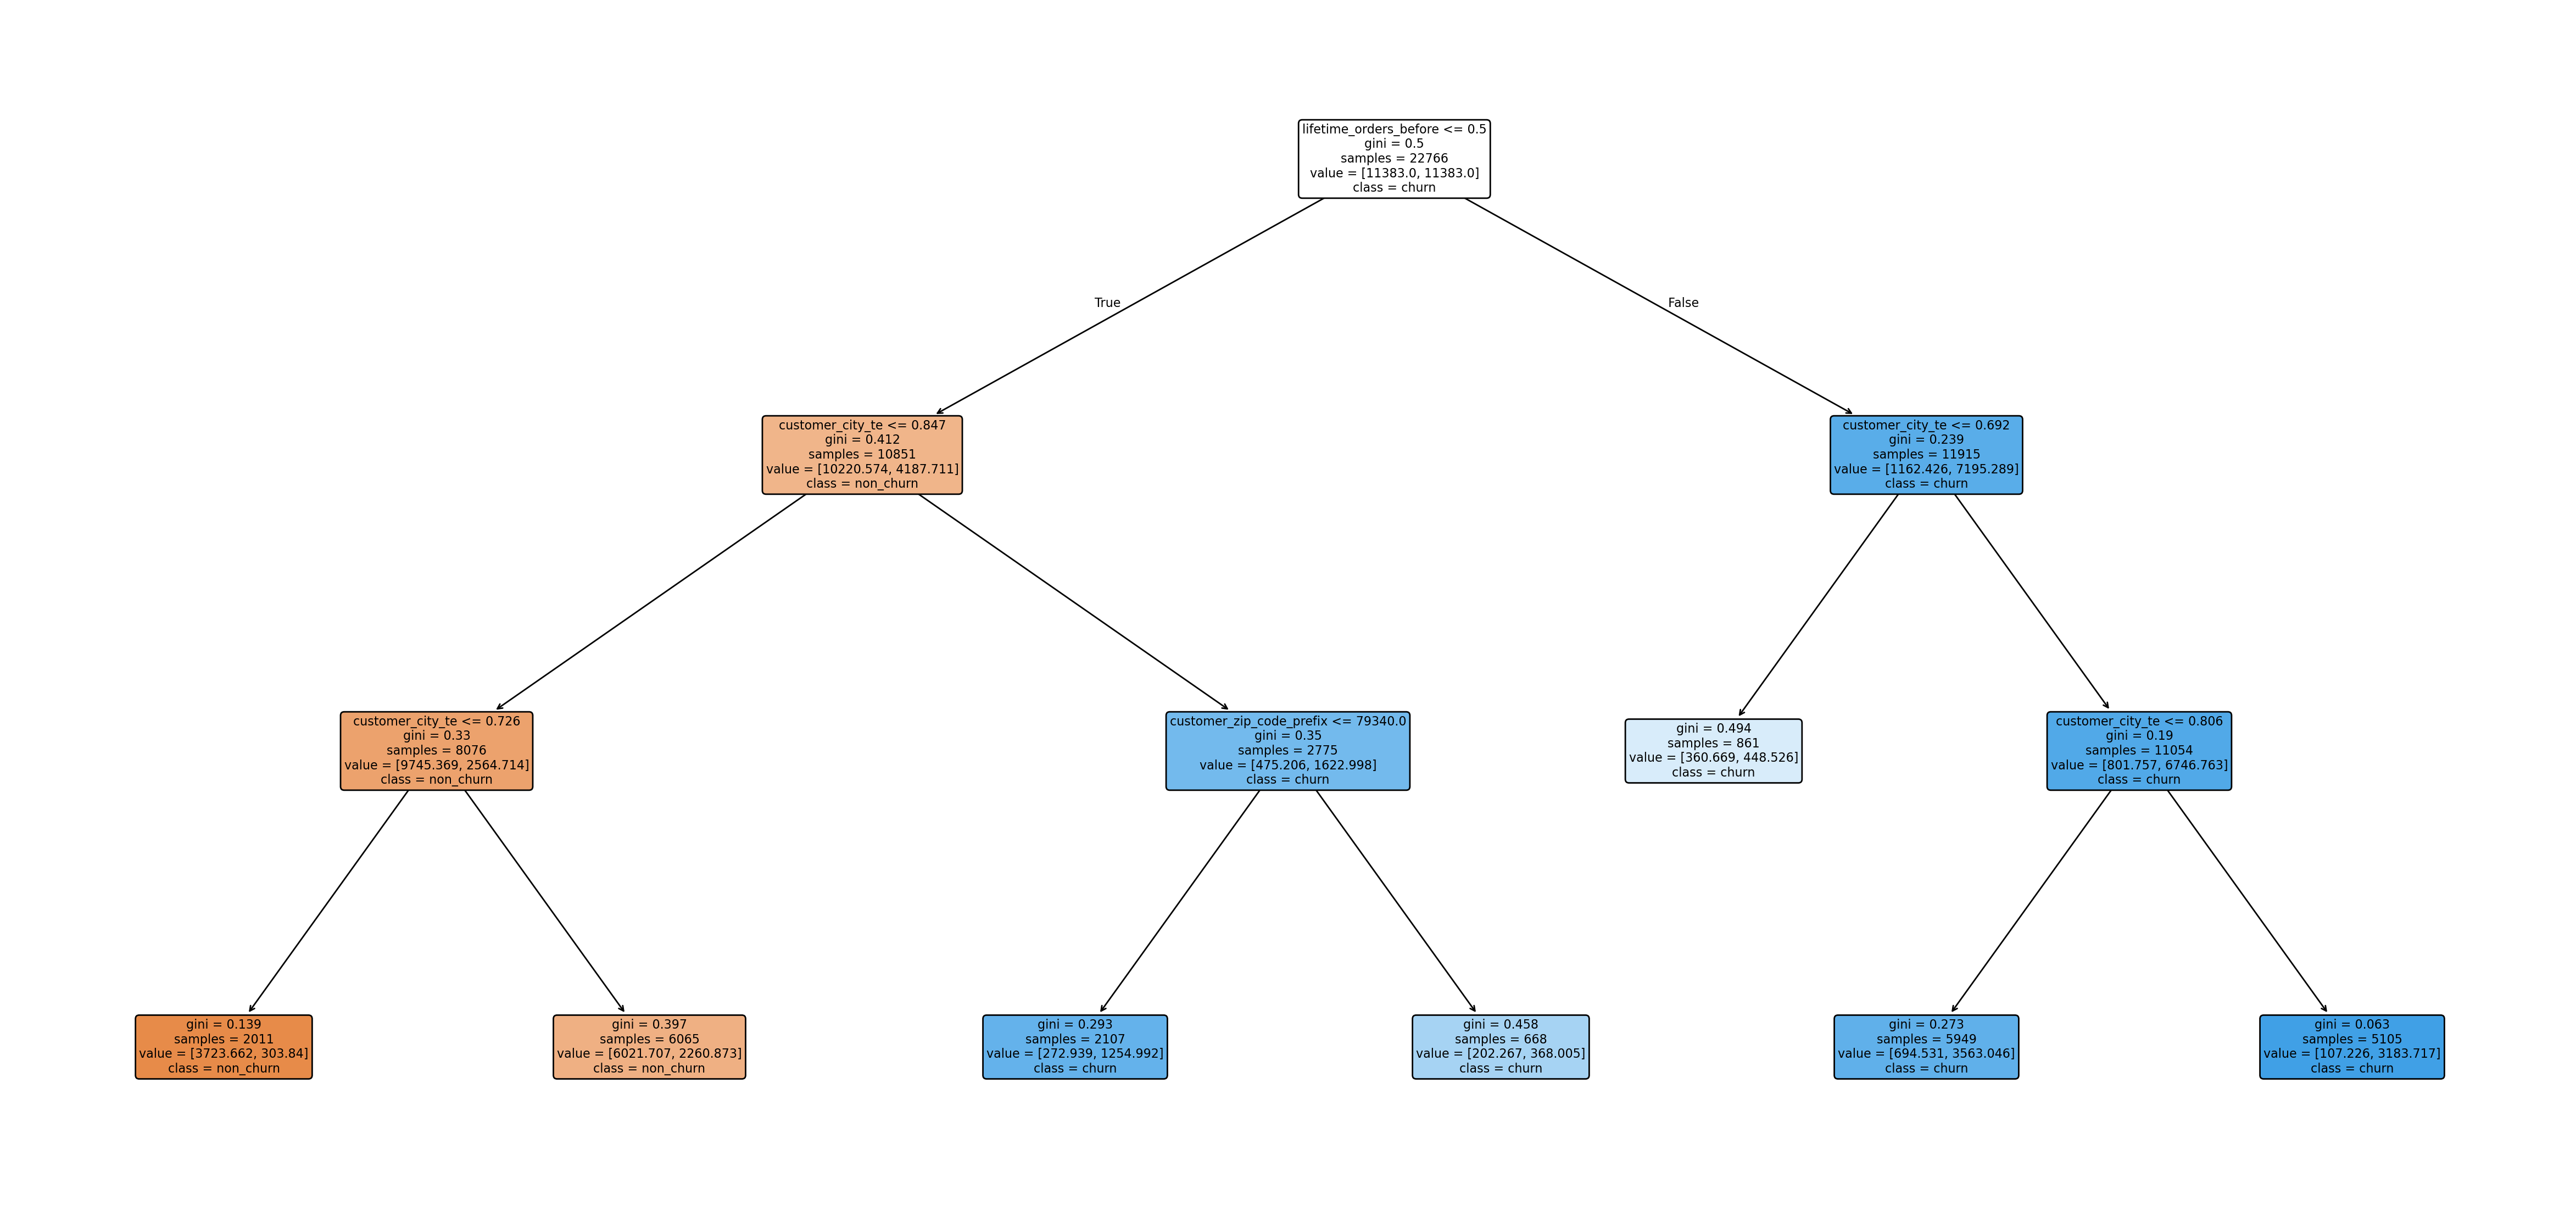

In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 14), dpi=200)
plot_tree(
    best_dt,  # your final tuned tree
    feature_names=X_train.columns.tolist(),
    class_names=["non_churn", "churn"],
    filled=True,
    rounded=True,
    max_depth=3,      # top decisions only
    fontsize=8
)
plt.show()


Churn risk is primarily explained by past engagement: users with fewer historical orders are far more likely to churn. Additionally, location effects exist: the model learns that some cities have systematically higher churn propensity than others.

Let's try dropping customer_city_te column and check

In [68]:
cols_wo_city = [c for c in X_train.columns if c != "customer_city_te"]

dt2 = DecisionTreeClassifier(max_depth=int(best_params["max_depth"]),
    min_samples_leaf=int(best_params["min_samples_leaf"]),
    min_samples_split=int(best_params["min_samples_split"]),
    class_weight="balanced",
    random_state=42)
dt2.fit(X_train[cols_wo_city], y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = dt2.predict(X_test[cols_wo_city])

print("Accuracy:", accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, digits=3))


Accuracy: 0.9696356275303644
[[ 783  111]
 [  39 4007]]
              precision    recall  f1-score   support

           0      0.953     0.876     0.913       894
           1      0.973     0.990     0.982      4046

    accuracy                          0.970      4940
   macro avg      0.963     0.933     0.947      4940
weighted avg      0.969     0.970     0.969      4940



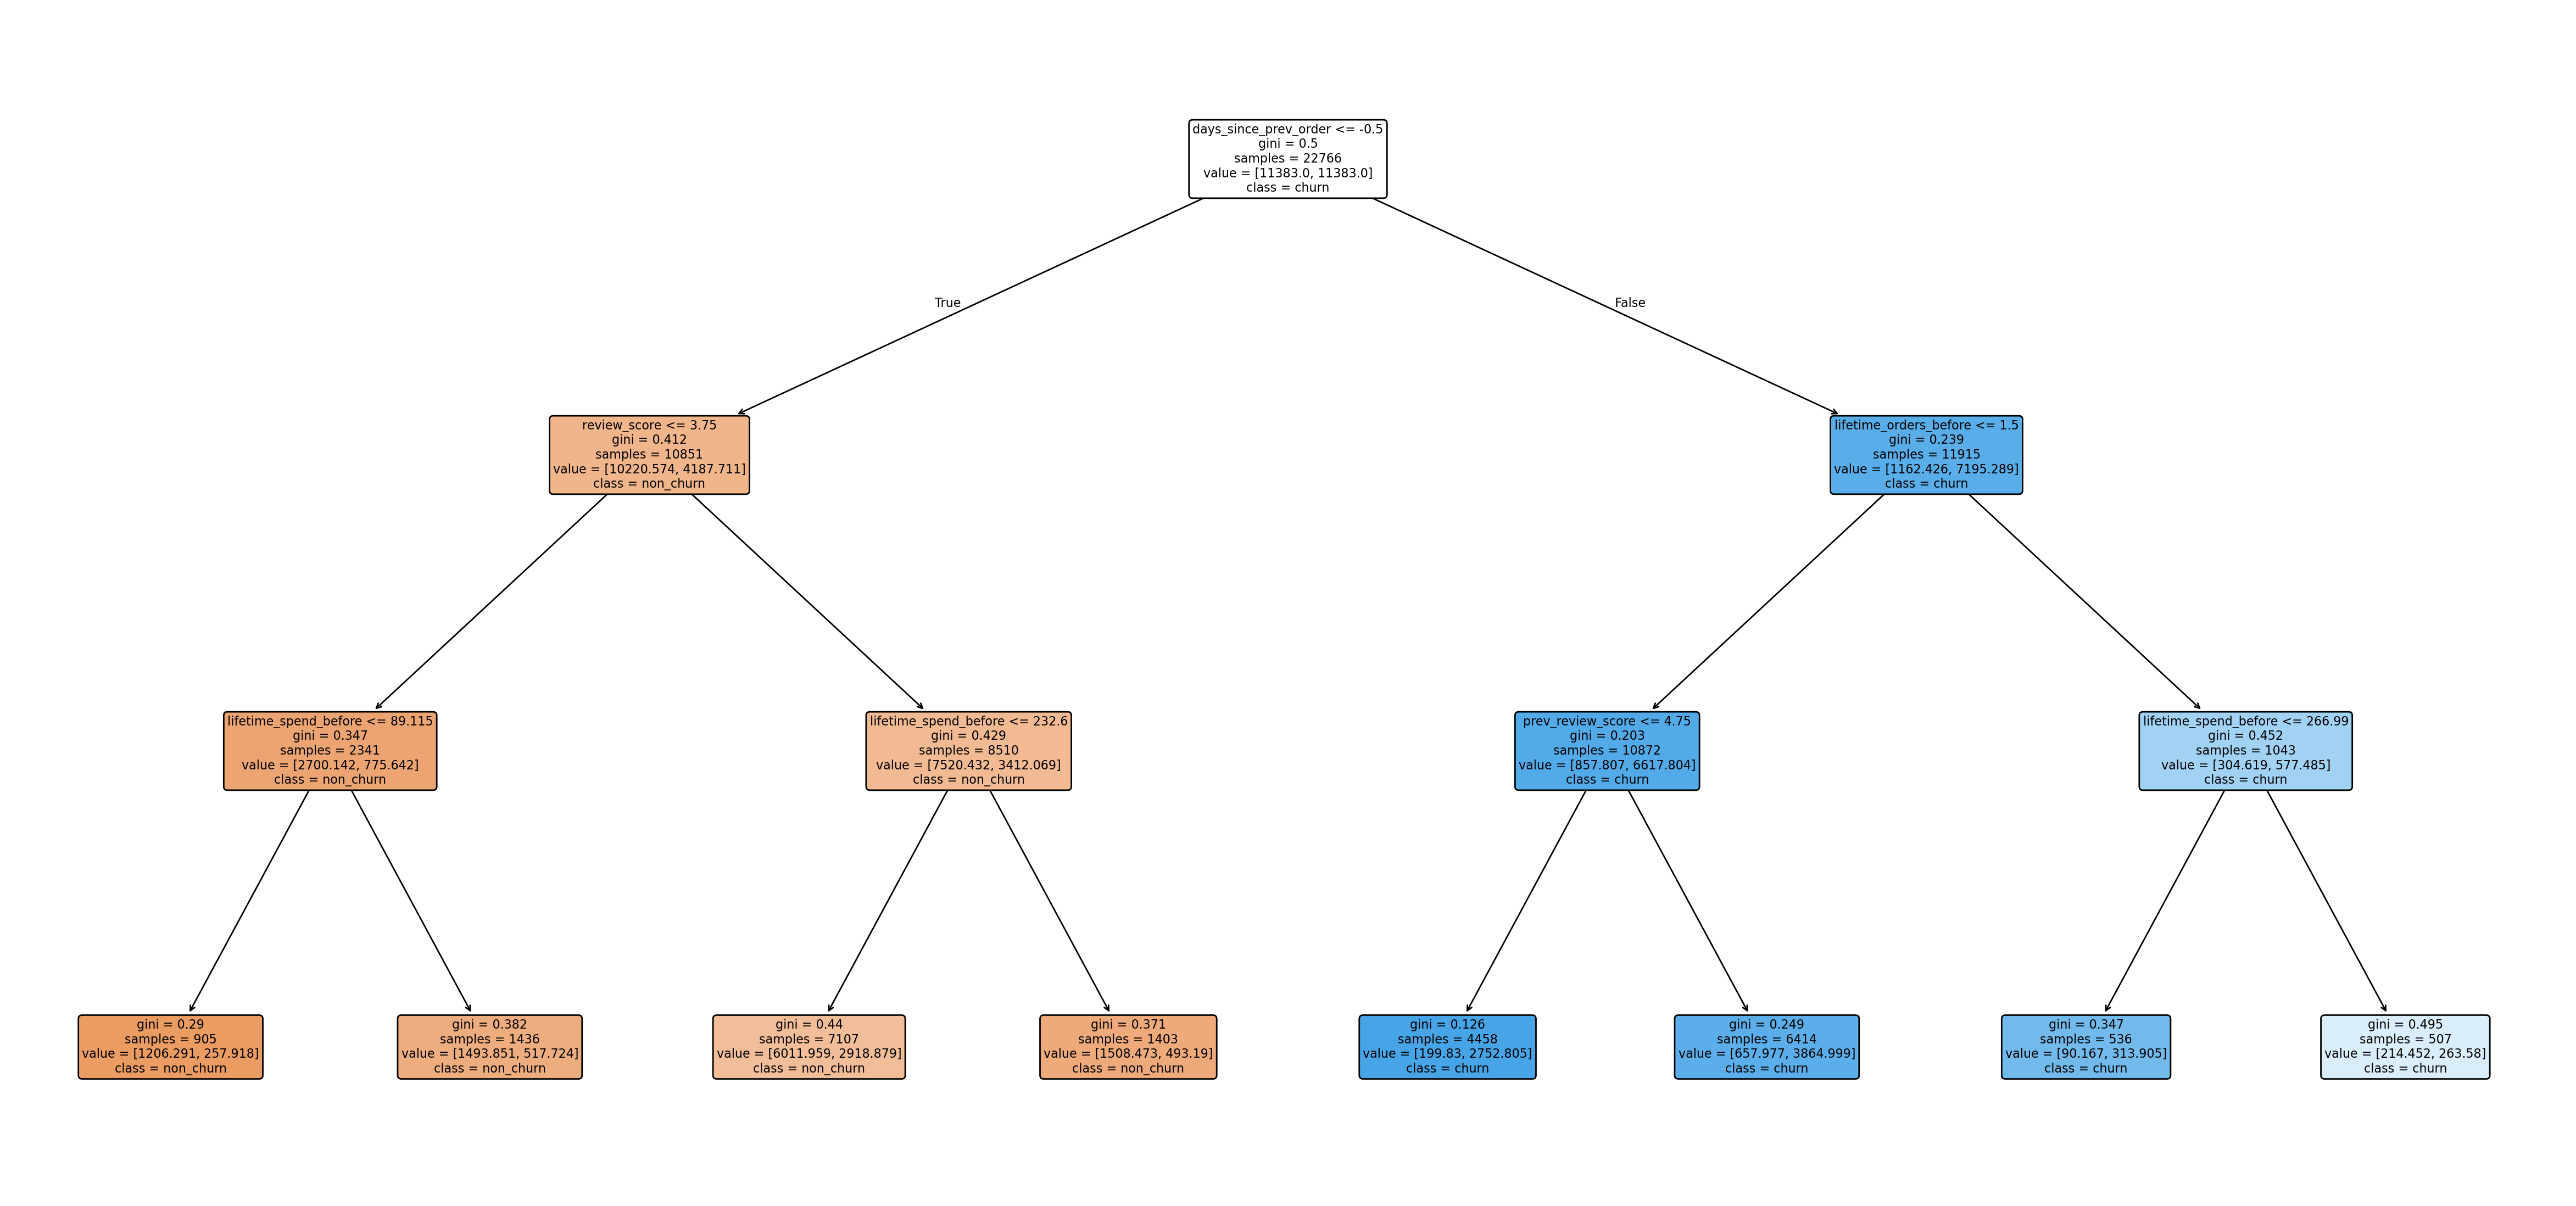

In [69]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 14), dpi=200)
plot_tree(
    dt2,  # your final tuned tree
    feature_names=X_train[cols_wo_city].columns.tolist(),
    class_names=["non_churn", "churn"],
    filled=True,
    rounded=True,
    max_depth=3,      # top decisions only
    fontsize=8
)
plt.show()


In [70]:
# Feature Importance

imp = pd.Series(dt2.feature_importances_, index=X_train[cols_wo_city].columns)
imp = imp.sort_values(ascending=False)

imp.head(10)

days_since_prev_order     0.944577
lifetime_orders_before    0.023036
lifetime_spend_before     0.014993
review_score              0.011457
prev_review_score         0.005937
days_since_last_order     0.000000
customer_state_PB         0.000000
customer_state_PR         0.000000
customer_state_PI         0.000000
customer_state_PE         0.000000
dtype: float64

It reduced reliance on geo proxies and improved generalization so we'll drop this column in further analysis and try the best parameters again.

In [71]:
def topk_metrics(y_true, p, k):
    y_true = np.asarray(y_true)
    n = len(y_true)
    top_n = max(1, int(np.ceil(k * n)))
    idx = np.argsort(-p)[:top_n]              # top risk users

    precision = y_true[idx].mean()            # coupon efficiency
    recall = y_true[idx].sum() / y_true.sum() # churner coverage
    return precision, recall, top_n

p_test = dt2.predict_proba(X_test[cols_wo_city])[:, 1]  # your final tuned tree probs

base_rate = y_test.mean()
print("Base churn rate:", base_rate)

for k in [0.01, 0.05, 0.10, 0.20]:
    prec, rec, top_n = topk_metrics(y_test.values, p_test, k)
    lift = prec / base_rate
    print(f"Top {int(k*100)}% (n={top_n}): precision={prec:.4f}, recall={rec:.4f}, lift={lift:.3f}") #Lift: copares targeting vs random (from base churn) 


Base churn rate: 0.8190283400809717
Top 1% (n=50): precision=1.0000, recall=0.0124, lift=1.221
Top 5% (n=247): precision=0.9676, recall=0.0591, lift=1.181
Top 10% (n=494): precision=0.9656, recall=0.1179, lift=1.179
Top 20% (n=988): precision=0.9696, recall=0.2368, lift=1.184


Let's tune Light GBM and see if we can get better results

In [72]:
cols = [c for c in X_train.columns if c != "customer_city_te"]
Xtr, Xva, Xte = X_train[cols], X_val[cols], X_test[cols]

In [73]:
#Base Model
lgbm = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=5000,          # large; early stopping will find best
    learning_rate=0.03,
    num_leaves=63,
    max_depth=-1,
    min_child_samples=200,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    reg_alpha=0.0,
    class_weight="balanced",    # simplest imbalance handling
    random_state=42,
    n_jobs=-1
)

lgbm.fit(
    Xtr, y_train,
    eval_set=[(Xva, y_val)],
    eval_metric="binary_logloss",
    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False)]
)

# 0.5 threshold metrics (secondary)
p_test = lgbm.predict_proba(Xte)[:, 1]
y_pred = (p_test >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
print("Best iteration:", lgbm.best_iteration_)


[LightGBM] [Info] Number of positive: 18095, number of negative: 4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1440
[LightGBM] [Info] Number of data points in the train set: 22766, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Accuracy: 0.9459514170040486
[[ 670  224]
 [  43 4003]]
              precision    recall  f1-score   support

           0      0.940     0.749     0.834       894
           1      0.947     0.989     0.968      4046

    accuracy                          0.946      4940
   macro avg      0.943     0.869     0.901      4940
weighted avg      0.946     0.946     0.943      4940

Best iteration: 262


In [74]:
def topk_metrics(y_true, p, ks=(0.01, 0.05, 0.10, 0.20)):
    y_true = np.asarray(y_true)
    base = y_true.mean()
    total_pos = y_true.sum()

    for k in ks:
        top_n = max(1, int(np.ceil(k * len(y_true))))
        idx = np.argsort(-p)[:top_n]
        precision = y_true[idx].mean()
        recall = y_true[idx].sum() / total_pos
        lift = precision / base
        print(f"Top {int(k*100)}% (n={top_n}): precision={precision:.4f}, recall={recall:.4f}, lift={lift:.3f}")

print("Base churn rate:", y_test.mean())
topk_metrics(y_test.values, p_test)


Base churn rate: 0.8190283400809717
Top 1% (n=50): precision=1.0000, recall=0.0124, lift=1.221
Top 5% (n=247): precision=0.9636, recall=0.0588, lift=1.176
Top 10% (n=494): precision=0.9737, recall=0.1189, lift=1.189
Top 20% (n=988): precision=0.9747, recall=0.2380, lift=1.190


In [75]:
#Grid Search
def recall_at_k(y_true, p, k=0.10):
    y_true = np.asarray(y_true)
    top_n = max(1, int(np.ceil(k * len(y_true))))
    idx = np.argsort(-p)[:top_n]
    return y_true[idx].sum() / y_true.sum()

grid = []
for lr in [0.03, 0.05]:
    for leaves in [31, 63, 127]:
        for min_child in [50, 100, 200, 400]:
            for subs in [0.7, 0.8, 0.9]:
                for colsamp in [0.7, 0.8, 0.9]:
                    for reg_l in [0.0, 1.0, 5.0]:
                        grid.append((lr, leaves, min_child, subs, colsamp, reg_l))

rows = []
best_model = None
best_score = -1
best_params = None

for lr, leaves, min_child, subs, colsamp, reg_l in grid:
    m = lgb.LGBMClassifier(
        objective="binary",
        n_estimators=5000,
        learning_rate=lr,
        num_leaves=leaves,
        min_child_samples=min_child,
        subsample=subs,
        colsample_bytree=colsamp,
        reg_lambda=reg_l,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )

    m.fit(
        Xtr, y_train,
        eval_set=[(Xva, y_val)],
        eval_metric="binary_logloss",
        callbacks=[lgb.early_stopping(100, verbose=False)]
    )

    p_val = m.predict_proba(Xva)[:, 1]
    r10 = recall_at_k(y_val.values, p_val, k=0.10)
    r05 = recall_at_k(y_val.values, p_val, k=0.05)

    rows.append({
        "lr": lr, "num_leaves": leaves, "min_child": min_child,
        "subsample": subs, "colsample": colsamp, "reg_lambda": reg_l,
        "best_iter": m.best_iteration_,
        "recall@10_val": r10,
        "recall@5_val": r05
    })

    # choose by recall@10, tie-break by recall@5
    score = (r10, r05)
    if score > best_score if isinstance(best_score, float) else False:
        pass


[LightGBM] [Info] Number of positive: 18095, number of negative: 4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 22766, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Info] Number of positive: 18095, number of negative: 4671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 22766, number of used features: 54
[LightGBM] [Info] [b

In [76]:
best_row = max(rows, key=lambda r: (r["recall@10_val"], r["recall@5_val"]))
best_row

{'lr': 0.03,
 'num_leaves': 31,
 'min_child': 50,
 'subsample': 0.7,
 'colsample': 0.7,
 'reg_lambda': 1.0,
 'best_iter': 540,
 'recall@10_val': 0.1298598254430045,
 'recall@5_val': 0.06506215286961121}

In [77]:
best_model = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=5000,
    learning_rate=best_row["lr"],
    num_leaves=best_row["num_leaves"],
    min_child_samples=best_row["min_child"],
    subsample=best_row["subsample"],
    colsample_bytree=best_row["colsample"],
    reg_lambda=best_row["reg_lambda"],
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    verbosity=-1
)

best_model.fit(
    Xtr, y_train,
    eval_set=[(Xva, y_val)],
    eval_metric="binary_logloss",
    callbacks=[lgb.early_stopping(50, verbose=False)]
)


LGBMClassifier(class_weight='balanced', colsample_bytree=0.7,
               learning_rate=0.03, min_child_samples=50, n_estimators=5000,
               n_jobs=-1, objective='binary', random_state=42, reg_lambda=1.0,
               subsample=0.7, verbosity=-1)

In [78]:
p_test = best_model.predict_proba(Xte)[:, 1]
print("Base churn rate:", y_test.mean())
topk_metrics(y_test.values, p_test)

y_pred = (p_test >= 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))


Base churn rate: 0.8190283400809717
Top 1% (n=50): precision=1.0000, recall=0.0124, lift=1.221
Top 5% (n=247): precision=0.9838, recall=0.0601, lift=1.201
Top 10% (n=494): precision=0.9879, recall=0.1206, lift=1.206
Top 20% (n=988): precision=0.9838, recall=0.2402, lift=1.201
[[ 664  230]
 [  70 3976]]
              precision    recall  f1-score   support

           0      0.905     0.743     0.816       894
           1      0.945     0.983     0.964      4046

    accuracy                          0.939      4940
   macro avg      0.925     0.863     0.890      4940
weighted avg      0.938     0.939     0.937      4940



## Conclusion

Summary, base churn rate is 0.819. Models performance

#### LightGBM
* Top 10%: precision 0.9879, recall 0.1206, lift 1.206
* Top 20%: precision 0.9838, recall 0.2402, lift 1.201

Threshold (0.5) confusion matrix
* Missed churners (FN) = 70 (recall churn 0.983)
* Coupon waste (FP) = 230 (waste among predicted churn ≈ 230/(3976+230)=5.47%)
* Accuracy 0.939

#### Decision Tree (without city_te)
* Top 10% : precision=0.9656, recall=0.1179, lift=1.179
* Top 20% : precision=0.9696, recall=0.2368, lift=1.184

Threshold (0.5) confusion matrix
* Missed churners (FN) = 39 (recall churn 0.990)
* Coupon waste (FP) = 111 
* Accuracy 0.970


#### Conclusion: 
We tried advanced models (LightGBM) but the constrained Decision Tree generalized best and was most interpretable, so we selected it.

We can’t coupon everyone, so we rank users weekly by churn risk.
* If we coupon the Top 10%, we catch ~12% of churners in that at-risk pool with ~99% precision (very low waste).
* If we coupon Top 20%, we catch ~24% of churners with similar precision.

Why recall looks “low”:
Because churn base rate is high (82%), meaning many churners exist across the whole at-risk pool, not just concentrated at the extreme top. With limited budget K%, you can only cover ~K%–a bit more of all churners.

##### "This model predicts churn risk, not coupon uplift"

To measure impact, we need an A/B test: target vs holdout.

#### Limitations
* Model predicts churn risk, not causal uplift.
* High churn base rate in at-risk cohort reduces achievable lift.
* City/state features may encode socioeconomic proxies; removed city target encoding for generalization.
* Olist has low repeat purchase behavior → limits 1-order modeling.

#### Next steps
* A/B test coupon targeting policy.
* Add uplift modeling / treatment-effect estimation if treatment data exists.
* Consider survival modeling for time-to-next-order.

*This churn model is designed for repeat customers only because cadence-based features require purchase history.* 

*For first-time buyers we recommend a separate ‘second purchase’ model using first-order experience features.*

## 1 order churn prediction model

In [79]:
X_DAYS = 60

# attach customer_unique_id to orders
o = dfs['olist_orders_dataset'].merge(dfs['olist_customers_dataset'][["customer_id","customer_unique_id"]], on="customer_id", how="left").copy()
o["order_ts"] = pd.to_datetime(o["order_purchase_timestamp"])
o = o.sort_values(["customer_unique_id","order_ts"])

# rank orders per customer
o["order_rank"] = o.groupby("customer_unique_id").cumcount() + 1

first = o[o["order_rank"] == 1][["customer_unique_id","order_id","order_ts",
                                 "order_status","order_delivered_customer_date","order_estimated_delivery_date"]].rename(
    columns={"order_id":"first_order_id","order_ts":"first_ts"}
)

second = o[o["order_rank"] == 2][["customer_unique_id","order_ts"]].rename(columns={"order_ts":"second_ts"})

df1 = first.merge(second, on="customer_unique_id", how="left")

# label: second order within X days
df1["reorder_within_X"] = (
    df1["second_ts"].notna() &
    ((df1["second_ts"] - df1["first_ts"]).dt.days <= X_DAYS)
).astype(int)

# label cutoff to avoid leakage near dataset end
max_ts = o["order_ts"].max()
label_cutoff = max_ts - pd.Timedelta(days=X_DAYS)
df1 = df1[df1["first_ts"] <= label_cutoff].copy()

print("Rows (customers):", len(df1))
print("Reorder rate:", df1["reorder_within_X"].mean())


Rows (customers): 94669
Reorder rate: 0.019584024337428303


In [80]:
# 1) How many customers in raw orders?
print("Unique customers (unique_id):", o["customer_unique_id"].nunique())

# 2) Orders per customer_unique_id distribution
cnt = o.groupby("customer_unique_id")["order_id"].nunique()
print(cnt.describe())
print("Share with >=2 orders:", (cnt >= 2).mean())

# 3) In your first-order dataset, how many actually have a second order at all?
print("Second order exists rate:", df1["second_ts"].notna().mean())

# 4) Among those who have a second order, what's the gap distribution?
gaps = (df1.loc[df1["second_ts"].notna(), "second_ts"] - df1.loc[df1["second_ts"].notna(), "first_ts"]).dt.days
print(gaps.describe())
print("Share <=60 days among those with 2nd order:", (gaps <= 60).mean())


Unique customers (unique_id): 96096
count    96096.000000
mean         1.034809
std          0.214384
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: order_id, dtype: float64
Share with >=2 orders: 0.031187562437562436
Second order exists rate: 0.03157316545014736
count    2989.000000
mean       80.184677
std       110.171043
min         0.000000
25%         0.000000
50%        28.000000
75%       123.000000
max       608.000000
dtype: float64
Share <=60 days among those with 2nd order: 0.6202743392438943


In [81]:
def make_label(df, X_DAYS):
    y = (
        df["second_ts"].notna()
        & ((df["second_ts"] - df["first_ts"]).dt.days <= X_DAYS)
    ).astype(int)
    return y

for X in [60, 90, 120, 180]:
    yx = make_label(df1, X)
    print(f"{X} days: reorder_rate={yx.mean():.4f}, churn_rate={1-yx.mean():.4f}")


60 days: reorder_rate=0.0196, churn_rate=0.9804
90 days: reorder_rate=0.0217, churn_rate=0.9783
120 days: reorder_rate=0.0235, churn_rate=0.9765
180 days: reorder_rate=0.0262, churn_rate=0.9738


#### The dataset exhibits very low repeat purchase behavior (only ~3% customers have ≥2 orders). Therefore, a ‘second order within 60 days’ model becomes extremely imbalanced and not very actionable. We focus the churn model on repeat customers where behavior signals exist and intervention is meaningful.